# Loading the data / Data Understanding
Following CRISP-ML best practices...

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/LoanData.csv')

# Display the first few rows of the dataset
df.head()

C:\Users\VKA\AppData\Local\Temp\ipykernel_2120\232191720.py:6: DtypeWarning: Columns (10,56,73,74,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/LoanData.csv')


,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,...,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,LoanCancelled,PreviousEarlyRepaymentsBeforeLoan
0,D8EBF360-104C-420F-BEC9-000924E6EFC7,3015853,2022-09-09 12:27:01,2022-09-09 15:27:01,11.0,0.0,88.0,False,2022-09-09 15:15:03,2022-09-09,...,NaN,2024-05-27,6.0,23.0,2023-11-30,NaN,NaN,NaN,NaN,NaN
1,C1A98DDA-5E20-429C-BBFF-0009A05354E0,3743447,2023-05-19 11:04:33,2023-05-19 14:04:33,0.0,0.0,0.0,False,2023-05-19 14:03:54,2023-05-19,...,NaN,2024-05-27,11.0,120.0,2023-07-20,NaN,NaN,91-120,NaN,NaN
2,9B0B252E-45B9-4172-8E2D-0014A8F18117,4335414,2024-02-03 14:43:32,2024-02-03 16:43:32,0.0,0.0,0.0,False,2024-02-03 16:41:51,2024-02-03,...,NaN,2024-07-08,2.0,12.0,2024-05-12,NaN,NaN,NaN,NaN,NaN
3,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970.0,1150.0,5.0,False,2016-03-17 12:39:22,2016-03-23,...,2020-01-27,NaN,NaN,NaN,NaN,0.0,82.76,180+,NaN,0.0
4,C7EA512A-465D-4043-A9F2-001B14C3C14E,4043783,2023-09-26 12:14:12,2023-09-26 15:14:12,0.0,0.0,0.0,False,2023-09-26 15:13:07,2023-09-26,...,NaN,2024-06-04,9.0,108.0,NaN,NaN,NaN,16-30,NaN,NaN


In [3]:
# What columns are causing the warning?
flagged_indices = [10, 56, 73, 74, 94, 95]
flagged_columns = df.columns[flagged_indices]

# Display the columns causing the warning, their types, and an example value with index
for col in flagged_columns:
    print(f"\nColumn: {col}")
    col_types = df[col].map(type)
    for t in col_types.unique():
        example_series = df[col][col_types == t]
        example_index = example_series.index[0]
        example_value = example_series.iloc[0]
        print(f"Type: {t.__name__}, Example: {example_value}, Index: {example_index}")


Column: ContractEndDate
Type: str, Example: 2025-10-27, Index: 0
Type: float, Example: nan, Index: 4

Column: DefaultDate
Type: float, Example: nan, Index: 0
Type: str, Example: 2020-01-14, Index: 3

Column: CreditScoreEsEquifaxRisk
Type: float, Example: nan, Index: 0
Type: str, Example: B, Index: 14

Column: CreditScoreFiAsiakasTietoRiskGrade
Type: float, Example: nan, Index: 0
Type: str, Example: 3, Index: 1

Column: ActiveLateLastPaymentCategory
Type: float, Example: nan, Index: 0
Type: str, Example: 91-120, Index: 1

Column: LoanCancelled
Type: float, Example: nan, Index: 0
Type: bool, Example: False, Index: 389970


These dates are specified as follows as per the API documentation (https://api.bondora.com/doc/ResourceModel?modelName=PublicDatasetItem&v=1):

- ContractEndDate = Date
- DefaultDate = Date
- CreditScoreEsEquifaxRisk = string
- CreditScoreFiAsiakasTietoRiskGrade = string
- ActiveLateLastPaymentCategory = string
- LoanCancelled = boolean

The warning is due to the fact that these columns are not being read in as the correct data types. Should be handled in the data preparation step.

In [3]:
# Show basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400170 entries, 0 to 400169
Data columns (total 97 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   LoanId                                  400170 non-null  object 
 1   LoanNumber                              400170 non-null  int64  
 2   ListedOnUTC                             400170 non-null  object 
 3   BiddingStartedOn                        400170 non-null  object 
 4   BidsPortfolioManager                    400170 non-null  float64
 5   BidsApi                                 400170 non-null  float64
 6   BidsManual                              400170 non-null  float64
 7   NewCreditCustomer                       400170 non-null  bool   
 8   LoanApplicationStartedDate              400170 non-null  object 
 9   LoanDate                                400170 non-null  object 
 10  ContractEndDate                         1030

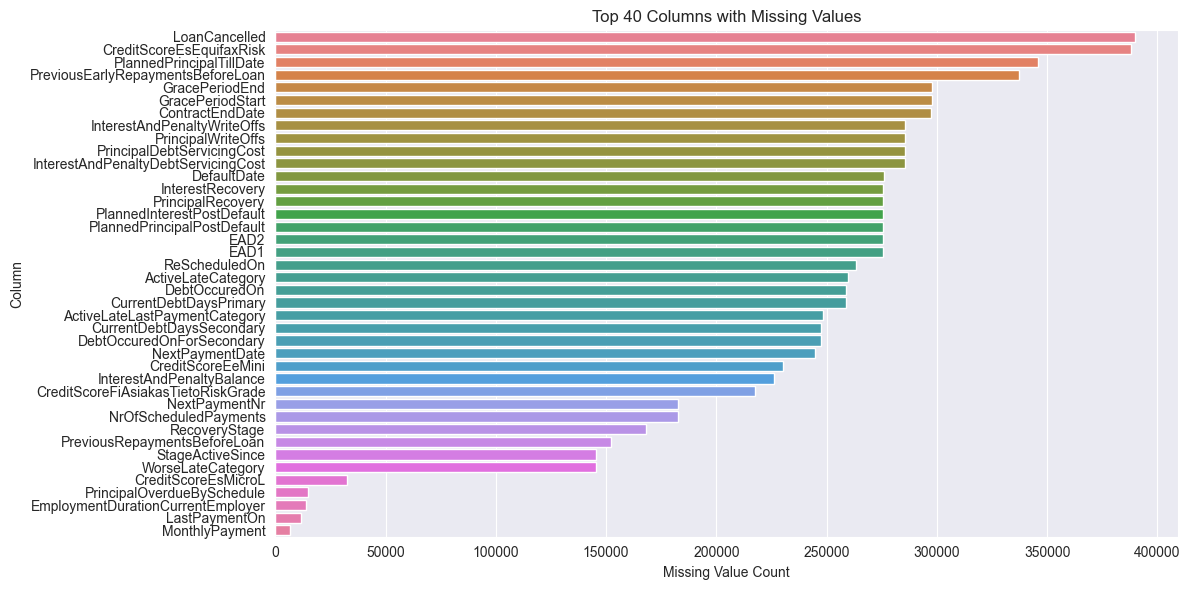

,Column,MissingCount,MissingPercent,category
0,LoanCancelled,389970,97.45,LT
1,CreditScoreEsEquifaxRisk,387951,96.95,LT
2,PlannedPrincipalTillDate,345706,86.39,LT
3,PreviousEarlyRepaymentsBeforeLoan,337407,84.32,LT
4,GracePeriodEnd,297894,74.44,LT
5,GracePeriodStart,297894,74.44,LT
6,ContractEndDate,297158,74.26,LT
7,InterestAndPenaltyWriteOffs,285617,71.37,LT
8,PrincipalWriteOffs,285617,71.37,LT
9,PrincipalDebtServicingCost,285617,71.37,LT


In [31]:
# Check for missing values across all columns
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]

# Create a DataFrame from the Series
missing_df = missing_values.reset_index()
missing_df.columns = ['Column', 'MissingCount']

total_rows = len(df)
missing_df['MissingPercent'] = (100 * missing_df['MissingCount'] / total_rows).round(2)

bp_cols = {
    "NewCreditCustomer",
    "VerificationType",
    "LanguageCode",
    "Age",
    "Gender",
    "Country",
    "Education",
    "EmploymentDurationCurrentEmployer",
    "OccupationArea",
    "HomeOwnershipType",
    "IncomeFromPrincipalEmployer",
    "IncomeFromPension",
    "IncomeFromFamilyAllowance",
    "IncomeFromSocialWelfare",
    "IncomeFromLeavePay",
    "IncomeFromChildSupport",
    "IncomeOther",
    "IncomeTotal",
    "ExistingLiabilities",
    "LiabilitiesTotal",
    "RefinanceLiabilities",
    "DebtToIncome",
    "FreeCash"
}
missing_df["category"] = missing_df["Column"].apply(
    lambda col: "BP" if col in bp_cols else "LT"
)

# Plot the missing values
plt.figure(figsize=(12, 6))
sns.barplot(
    data=missing_df.head(40),
    x='MissingCount',
    y='Column',
    hue='Column',
    legend=False,
)
plt.title("Top 40 Columns with Missing Values")
plt.xlabel("Missing Value Count")
plt.ylabel("Column")
plt.tight_layout()
plt.show()

# Display the DataFrame of missing values
missing_df

In [72]:
missing_df_copy = missing_df.copy()
read_extra_information = pd.read_excel(
    "data/Descriptions_columns.xlsx",
    header=0,
)

read_extra_information = read_extra_information.rename(columns={"Name": "Column"})
read_extra_information = read_extra_information.rename(columns={"Additional": "AdditionalInfo"})
# 
for x in read_extra_information.index:
    info = str(read_extra_information.at[x, "AdditionalInfo"])
    if "Obsolete" in info:
        read_extra_information.at[x, "ActiveFlag"] = 0
    else:
        read_extra_information.at[x, "ActiveFlag"] = 1

merged_df_new = pd.merge(
    missing_df_copy,
    read_extra_information[["Column", "ActiveFlag", "Description"]],
    on="Column",
    how="left"
)

# merged_df_new.to_excel("data/feauter_analyse.xlsx", index=False, header=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Column          57 non-null     object 
 1   MissingCount    57 non-null     int64  
 2   MissingPercent  57 non-null     float64
 3   category        57 non-null     object 
 4   ActiveFlag      56 non-null     float64
 5   Description     56 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


In [87]:
# Check the number of unique values in each column
unique_counts = df.nunique().sort_values(ascending=False)
unique_counts

LoanId                               400170
LoanNumber                           400166
BiddingStartedOn                     398634
ListedOnUTC                          398622
LoanApplicationStartedDate           398565
                                      ...  
RecoveryStage                             3
Restructured                              2
NewCreditCustomer                         2
LoanCancelled                             2
ActiveScheduleFirstPaymentReached         2
Length: 97, dtype: int64

In [88]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Number of duplicate rows: {duplicate_rows}")
else:
    print("No duplicate rows found. Valeri")

No duplicate rows found.


In [64]:
df_copy = df.copy()
bp_cols = {
    "NewCreditCustomer",
    "VerificationType",
    "LanguageCode",
    "Age",
    "Gender",
    "Country",
    "Education",
    "EmploymentDurationCurrentEmployer",
    "OccupationArea",
    "HomeOwnershipType",
    "IncomeFromPrincipalEmployer",
    "IncomeFromPension",
    "IncomeFromFamilyAllowance",
    "IncomeFromSocialWelfare",
    "IncomeFromLeavePay",
    "IncomeFromChildSupport",
    "IncomeOther",
    "IncomeTotal",
    "ExistingLiabilities",
    "LiabilitiesTotal",
    "RefinanceLiabilities",
    "DebtToIncome",
    "FreeCash"
}
cols_df = pd.DataFrame(df_copy.columns, columns=["ColumnName"])
cols_df["category"] = cols_df["ColumnName"].apply(
    lambda col: "BP" if col in bp_cols else "LT"
)
cols_df

,ColumnName,category
0,LoanId,LT
1,LoanNumber,LT
2,ListedOnUTC,LT
3,BiddingStartedOn,LT
4,BidsPortfolioManager,LT
...,...,...
92,PrincipalDebtServicingCost,LT
93,InterestAndPenaltyDebtServicingCost,LT
94,ActiveLateLastPaymentCategory,LT
95,LoanCancelled,LT


In [26]:
# For grouping purposes 
quoted_cols = [f'"{col}"' for col in df_copy.columns]

# build and export
cols_df = pd.DataFrame(quoted_cols, columns=['ColumnName'])
cols_df.to_excel("data/bondora_loans_transposed_new.xlsx", index=False, header=False)

In [83]:
high_missing = missing_df[missing_df["MissingPercent"] > 50]
cols_to_drop = high_missing["Column"].tolist()
print("Columns with >50% missing:", cols_to_drop)


Columns with >50% missing: ['LoanCancelled', 'CreditScoreEsEquifaxRisk', 'PlannedPrincipalTillDate', 'PreviousEarlyRepaymentsBeforeLoan', 'GracePeriodEnd', 'GracePeriodStart', 'ContractEndDate', 'InterestAndPenaltyWriteOffs', 'PrincipalWriteOffs', 'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost', 'DefaultDate', 'InterestRecovery', 'PrincipalRecovery', 'PlannedInterestPostDefault', 'PlannedPrincipalPostDefault', 'EAD2', 'EAD1', 'ReScheduledOn', 'ActiveLateCategory', 'DebtOccuredOn', 'CurrentDebtDaysPrimary', 'ActiveLateLastPaymentCategory', 'CurrentDebtDaysSecondary', 'DebtOccuredOnForSecondary', 'NextPaymentDate', 'CreditScoreEeMini', 'InterestAndPenaltyBalance', 'CreditScoreFiAsiakasTietoRiskGrade']


In [68]:
import numpy as np

read_extra = pd.read_excel(
    "data/Descriptions_columns.xlsx",
    header=0,
)

read_extra = read_extra.rename(columns={"Name": "ColumnName"})
read_extra = read_extra.rename(columns={"Additional": "AdditionalInfo"})
# 
for x in read_extra.index:
    info = str(read_extra.at[x, "AdditionalInfo"])
    if "Obsolete" in info:
        read_extra.at[x, "ActiveFlag"] = 0
    else:
        read_extra.at[x, "ActiveFlag"] = 1

merged_df = pd.merge(
    cols_df,
    read_extra[["ColumnName", "Description", "ActiveFlag"]],
    on="ColumnName",
    how="left"
)

merged_df


,ColumnName,category,Description,ActiveFlag
0,LoanId,LT,A unique ID given to a loan,1.0
1,LoanNumber,LT,A unique loan number displayed in Bondora's sy...,1.0
2,ListedOnUTC,LT,Date when the loan application appeared on Pri...,1.0
3,BiddingStartedOn,LT,Date when the auction bidding started on,1.0
4,BidsPortfolioManager,LT,The amount of investment offers made by Portfo...,1.0
...,...,...,...,...
92,PrincipalDebtServicingCost,LT,Service cost related to the recovery of the de...,1.0
93,InterestAndPenaltyDebtServicingCost,LT,Service cost related to the recovery of the de...,1.0
94,ActiveLateLastPaymentCategory,LT,NaN,NaN
95,LoanCancelled,LT,If Loan was cancelled,1.0


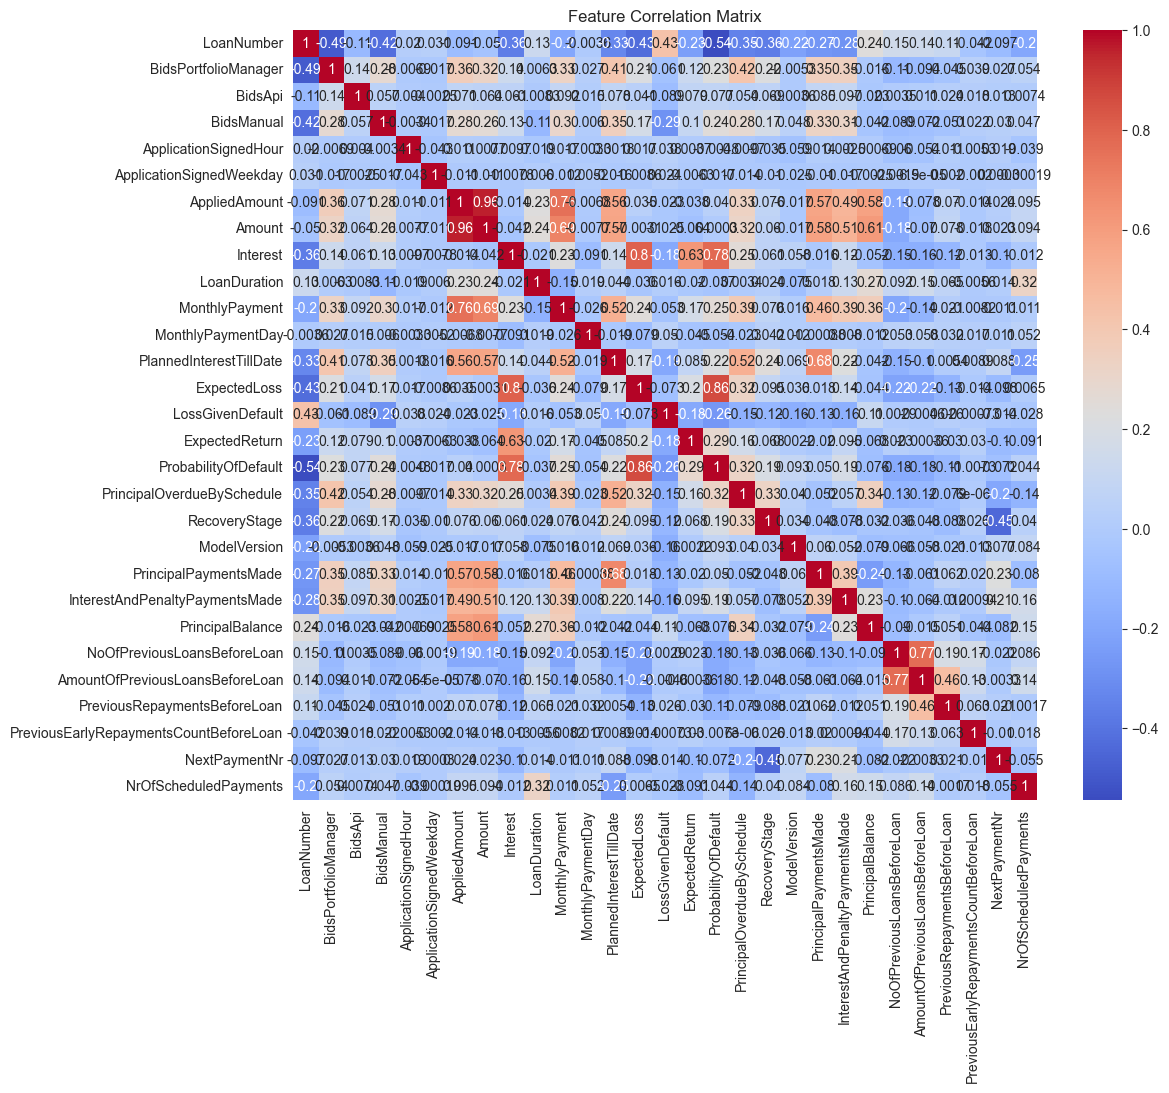

In [91]:
df_copy = df.copy()
bp_cols = {
    "NewCreditCustomer",
    "VerificationType",
    "LanguageCode",
    "Age",
    "Gender",
    "Country",
    "Education",
    "EmploymentDurationCurrentEmployer",
    "OccupationArea",
    "HomeOwnershipType",
    "IncomeFromPrincipalEmployer",
    "IncomeFromPension",
    "IncomeFromFamilyAllowance",
    "IncomeFromSocialWelfare",
    "IncomeFromLeavePay",
    "IncomeFromChildSupport",
    "IncomeOther",
    "IncomeTotal",
    "ExistingLiabilities",
    "LiabilitiesTotal",
    "RefinanceLiabilities",
    "DebtToIncome",
    "FreeCash"
}
more_50_missing = {
    'LoanCancelled', 'CreditScoreEsEquifaxRisk', 'PlannedPrincipalTillDate', 'PreviousEarlyRepaymentsBeforeLoan', 'GracePeriodEnd', 'GracePeriodStart', 'ContractEndDate', 'InterestAndPenaltyWriteOffs', 'PrincipalWriteOffs', 'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost', 'DefaultDate', 'InterestRecovery', 'PrincipalRecovery', 'PlannedInterestPostDefault', 'PlannedPrincipalPostDefault', 'EAD2', 'EAD1', 'ReScheduledOn', 'ActiveLateCategory', 'DebtOccuredOn', 'CurrentDebtDaysPrimary', 'ActiveLateLastPaymentCategory', 'CurrentDebtDaysSecondary', 'DebtOccuredOnForSecondary', 'NextPaymentDate', 'CreditScoreEeMini', 'InterestAndPenaltyBalance', 'CreditScoreFiAsiakasTietoRiskGrade'
}
df_copy = df_copy.drop(columns=list(bp_cols))
df_copy = df_copy.drop(columns=list(more_50_missing))
# df_copy
num_df = df_copy.select_dtypes(include=[np.number])

# 
corr_matrix = num_df.corr()

import matplotlib.pyplot as plt

# 3) Plot heatmap to visualize all 45 features
# plt.figure(figsize=(14, 14))
# im = plt.imshow(corr_matrix, interpolation='none', aspect='equal')
# plt.colorbar(im)
# plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
# plt.title('Feature Correlation Matrix')
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.title("Feature Correlation Matrix")
plt.show()

In [93]:
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
high_corr = corr_matrix.where(mask)
high_pairs = (
    high_corr
    .stack()
    .reset_index()
    .rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "corr"})
    .query("corr > 0.8")
    .sort_values("corr", ascending=False)
)

# 6) Inspect or save
print(high_pairs)


         feature_1             feature_2      corr
153  AppliedAmount                Amount  0.963370
288   ExpectedLoss  ProbabilityOfDefault  0.862153
200       Interest          ExpectedLoss  0.801398


In [109]:
df_copy_copy = df.copy()
bp_cols = {
    "NewCreditCustomer",
    "VerificationType",
    "LanguageCode",
    "Age",
    "Gender",
    "Country",
    "Education",
    "EmploymentDurationCurrentEmployer",
    "OccupationArea",
    "HomeOwnershipType",
    "IncomeFromPrincipalEmployer",
    "IncomeFromPension",
    "IncomeFromFamilyAllowance",
    "IncomeFromSocialWelfare",
    "IncomeFromLeavePay",
    "IncomeFromChildSupport",
    "IncomeOther",
    "IncomeTotal",
    "ExistingLiabilities",
    "LiabilitiesTotal",
    "RefinanceLiabilities",
    "DebtToIncome",
    "FreeCash"
}
ordered_bp = [col for col in df_copy_copy.columns if col in bp_cols]
df_bp = df_copy_copy[ordered_bp]
num_df = df_copy_copy.select_dtypes(include=[np.number])
# corr_matrix = num_df.corr()
# plt.figure(figsize=(14, 14))
# im = plt.imshow(corr_matrix, interpolation='none', aspect='equal')
# plt.colorbar(im)
# plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
# plt.title('Feature Correlation Matrix')
# plt.tight_layout()
# plt.show()
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
high_corr = corr_matrix.where(mask)
high_pairs = (high_corr
    .stack()
    .reset_index()
    .rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "corr"})
    .query("corr > 0.8")
    .sort_values("corr", ascending=False)
)

print(high_pairs)

                       feature_1                            feature_2  \
1615      CurrentDebtDaysPrimary             CurrentDebtDaysSecondary   
680                       Amount                                 EAD1   
595                AppliedAmount                               Amount   
1591     PlannedInterestTillDate          PlannedPrincipalPostDefault   
1907           PrincipalRecovery  InterestAndPenaltyDebtServicingCost   
627                AppliedAmount                                 EAD1   
1849                        EAD1                                 EAD2   
1894           PrincipalRecovery                PrincipalPaymentsMade   
1676                ExpectedLoss                 ProbabilityOfDefault   
1780  PrincipalOverdueBySchedule          PlannedPrincipalPostDefault   
681                       Amount                                 EAD2   
725                     Interest                         ExpectedLoss   

          corr  
1615  0.998929  
680   0.966204  